# Twitter API pulling

#### Step 1: Make API call to Twitter and retrieve data

In [256]:
import requests
import os
import json

bearer_token = "{bearer_token}"
search_url = "https://api.twitter.com/2/tweets/search/all"

# Optional params: start_time,end_time,since_id,until_id,max_results,next_token,
# expansions,tweet.fields,media.fields,poll.fields,place.fields,user.fields

outputTweets = []
batch_size = 500
query_params = {'query': '(fertility treatment OR infertility OR ttc (trying to conceive) OR assisted reproductive technology (ART) OR reproductive treatment OR infertile) -is:retweet lang:en place_country:US'}
query_params['tweet.fields'] = 'created_at,source,text,author_id,lang,geo,id,conversation_id,public_metrics'
query_params['expansions'] = 'geo.place_id,author_id'
query_params['media.fields'] = 'url,type'
query_params['place.fields'] = 'country,country_code,full_name,geo,id,name,place_type'
query_params['user.fields'] = 'url,username,verified,withheld,id,location,name,public_metrics,description'
query_params['start_time'] = '2018-11-01T00:00:00Z'
query_params['end_time'] = '2021-12-01T00:00:00Z'
query_params['max_results'] = batch_size
iterate_bool = True
next_token = ""

while iterate_bool:
    
    if next_token != "":
        query_params['next_token'] = next_token
    
    response = requests.get(search_url, headers={"Authorization": f"Bearer {bearer_token}"}, params=query_params)
    tweets = response.json()

    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    else:
        outputTweets.append(tweets)
        
    if "next_token" not in tweets['meta']:
        iterate_bool = False
    else:
        next_token = tweets['meta']['next_token']
    print(next_token)
        
print(len(outputTweets))

b26v89c19zqg8o3fpdp8cievgvx21hwwk1feabnwekosd
b26v89c19zqg8o3fpdgapafa4ij3rvj74kobedyhgmb99
b26v89c19zqg8o3fostsgw9n8j0a0t2wzlse37jc9tdod
b26v89c19zqg8o3fosktzrw95k47ge0t5794ig1sm3b0d
b26v89c19zqg8o3fosbttskh1ry3wg8u1z6n35shfmbgd
b26v89c19zqg8o3fo7md33ffjdz943erkxyc0fii89j0d
b26v89c19zqg8o3fo7dg9y30d20tdw2coex5vbzip47lp
b26v89c19zqg8o3fo74gyko8wpc3c6fedazxem5fo3szh
b26v89c19zqg8o3fo6yegpbd5ovzol9rxezopasl5ejct
b26v89c19zqg8o3fnm8ztjs4i1wdxzzsbuosa94r6dit9
b26v89c19zqg8o3fnm00wqly4igrqfsewx1qcp7lfsygt
b26v89c19zqg8o3fnlr39r1cn6pjuw5wnvusrye1m0igt
b26v89c19zqg8o3fnlnzpinp4p7drb6j17x9j6hzwo1h9
b26v89c19zqg8o3fn0yk841aqqhjenz5zx9bt6pyaqrnh
b26v89c19zqg8o3fn0yk841aqqhjenz5zx9bt6pyaqrnh
15


#### Step 2: Save Twttier API response to Json 

In [257]:
file_name = 'IVF 2018-2021 all time_w reply .json'
with open("output/" + file_name, 'w') as f: 
    json.dump(outputTweets, f)

# Data processing

#### Step 1: Flatten Tweets and its data / location data and save them into Dataframe

In [1]:
import pandas as pd
import time

flatData = pd.DataFrame()



for rr in outputTweets:
    print(1)
    tweetsData = rr['data']
    userData = rr['includes']['users']
    placeData = rr['includes']['places']
    
    userDataDict = {}
    for u in userData:
        userDataDict[u['id']] = u
    
    placeDataDict = {}
    for p in placeData:
        placeDataDict[p['id']] = p
    
    
    for tw in tweetsData:
        #if 'geo' in tw:
        geo_city = placeDataDict[tw['geo']['place_id']]['full_name'] if 'geo' in tw and tw['geo']['place_id'] in placeDataDict else ""
        item = {'id': tw['id'],
                'date': time.strftime('%Y-%m-%d', time.strptime(tw['created_at'],'%Y-%m-%dT%H:%M:%S.%fZ')),
                'created_at': tw['created_at'],
                'count_retweet': tw['public_metrics']['retweet_count'],
                'like_count': tw['public_metrics']['like_count'],
                'text': tw['text'],
                'place_id': tw['geo']['place_id'] if 'geo' in tw else "",
                'geo': placeDataDict[tw['geo']['place_id']]['geo'] if 'geo' in tw and tw['geo']['place_id'] in placeDataDict else "",
                'geo_city': geo_city,
                'author_id': tw['author_id'], #userDataDict[tw['author_id']]['id'] if tw['author_id'] in userDataDict else "",
                'user_name': userDataDict[tw['author_id']]['username'] if tw['author_id'] in userDataDict else "",
                'user_follower': userDataDict[tw['author_id']]['public_metrics']['followers_count'] if tw['author_id'] in userDataDict else "",
                }
        
        flatData = flatData.append(item, ignore_index = True)
    
print(len(flatData))


NameError: name 'outputTweets' is not defined

#### Step 2: Reset index to be tweet's ID and remove duplicates

In [259]:
df = flatData
df[['id', 'author_id', 'created_at', 'text', 'place_id']].head()
df.set_index('id', inplace=True)
df.shape

(7283, 11)

In [167]:
# df[(df['date'] > '2020-04-15') & (df['date'] <= '2021-01-01')]

In [260]:
df[['text', 'created_at']].head(n=10)

,text,created_at
id,,
1465737021058605066,@RepSwalwell Facts are you are getting vax wit...,2021-11-30T17:38:32.000Z
1465724358433939462,@DavidDzimianski @AlsoACarpenter But he suppor...,2021-11-30T16:48:13.000Z
1465721691301191691,17 years ago this man &amp; his team from @Nor...,2021-11-30T16:37:37.000Z
1465663840557936650,The urge to say “at least i can have kids” whe...,2021-11-30T12:47:44.000Z
1465642273740312577,"Woman gives birth to 1st child at 50, followin...",2021-11-30T11:22:03.000Z
1465557016424988673,@lilbirdysaid @Shiphrah2030 God better help th...,2021-11-30T05:43:16.000Z
1465518152087973895,@VaxDemocrats @MattWalshBlog Are you trying to...,2021-11-30T03:08:50.000Z
1465481077234061317,@Inspired_Reigns I had to go through IVF due t...,2021-11-30T00:41:30.000Z
1465342449996517386,Then I think all the other meds im on can caus...,2021-11-29T15:30:39.000Z


In [261]:
df.drop_duplicates(subset='text',inplace=True)
df.shape

(7248, 11)

####  Step 3: Remove Stopwords and clean up symbols in the sentence

In [262]:
# import nltk
# nltk.download('stopwords')

from nltk.corpus import stopwords

#### SWORDS STARTS ####
additional  = ['rt','rts','retweet'] #we'll store additional stopwords here
standard_swords = set().union(stopwords.words('english'),additional) #big list containing all the stopwords + our additional ones

swords_file = open("self_defined_swords.txt", "r")
content_list = swords_file.readlines()
self_defined_stopwords = set().union(list(map(lambda s: s.strip(), content_list)), additional)


#### END ####

# Note: we won't use nltk's swords 
# swords = ['rt','rts','retweet']

df['cleaned_text'] = df['text'].str.lower()\
          .str.replace('&amp;', ' ')\
          .str.replace('(@[a-z0-9]+)\w+',' ')\
          .str.replace('(http\S+)', ' ')\
          .str.replace('([^a-z\t])',' ')\
          .str.replace('&amp',' ')\
          .str.replace(' +',' ')

df['processed_text'] = df['cleaned_text'].apply(lambda x: [i for i in x.split() if not i in additional])

df['processed_text_rm_standard_sw'] = df['cleaned_text']\
          .apply(lambda x: [i for i in x.split() if not i in standard_swords])

df['processed_text_rm_self_sw'] = df['cleaned_text']\
          .apply(lambda x: [i for i in x.split() if not i in self_defined_stopwords])

df[['text', 'cleaned_text', 'processed_text', 'processed_text_rm_standard_sw', 'processed_text_rm_self_sw']].head(10)


,text,cleaned_text,processed_text,processed_text_rm_standard_sw,processed_text_rm_self_sw
id,,,,,
1465737021058605066,@RepSwalwell Facts are you are getting vax wit...,facts are you are getting vax with a less tha...,"[facts, are, you, are, getting, vax, with, a, ...","[facts, getting, vax, less, death, rate, unles...","[facts, getting, vax, less, death, rate, unles..."
1465724358433939462,@DavidDzimianski @AlsoACarpenter But he suppor...,but he supports what his audience already wan...,"[but, he, supports, what, his, audience, alrea...","[supports, audience, already, wants, believe, ...","[supports, audience, already, wants, believe, ..."
1465721691301191691,17 years ago this man &amp; his team from @Nor...,years ago this man his team from fertility ga...,"[years, ago, this, man, his, team, from, ferti...","[years, ago, man, team, fertility, gave, oppor...","[years, ago, man, team, fertility, gave, oppor..."
1465663840557936650,The urge to say “at least i can have kids” whe...,the urge to say at least i can have kids when ...,"[the, urge, to, say, at, least, i, can, have, ...","[urge, say, least, kids, bitch, kids, ask, im,...","[urge, say, least, kids, bitch, no, kids, ask,..."
1465642273740312577,"Woman gives birth to 1st child at 50, followin...",woman gives birth to st child at following yea...,"[woman, gives, birth, to, st, child, at, follo...","[woman, gives, birth, st, child, following, ye...","[woman, gives, birth, st, child, following, ye..."
1465557016424988673,@lilbirdysaid @Shiphrah2030 God better help th...,god better help those pushing it knowing full...,"[god, better, help, those, pushing, it, knowin...","[god, better, help, pushing, knowing, full, we...","[god, better, help, pushing, knowing, full, we..."
1465518152087973895,@VaxDemocrats @MattWalshBlog Are you trying to...,are you trying to imply that a women is someo...,"[are, you, trying, to, imply, that, a, women, ...","[trying, imply, women, someone, get, pregnant,...","[trying, imply, women, someone, get, pregnant,..."
1465481077234061317,@Inspired_Reigns I had to go through IVF due t...,i had to go through ivf due to infertility is...,"[i, had, to, go, through, ivf, due, to, infert...","[go, ivf, due, infertility, issues, get, josie...","[go, ivf, due, infertility, issues, get, josie..."
1465342449996517386,Then I think all the other meds im on can caus...,then i think all the other meds im on can caus...,"[then, i, think, all, the, other, meds, im, on...","[think, meds, im, cause, like, cancer, birth, ...","[think, meds, im, cause, like, cancer, birth, ..."


#### (Optional) Step 4: Apply Stemming 


In [263]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
df['stemmed'] = df['processed_text_rm_standard_sw'].apply(lambda x: [ps.stem(i) for i in x if i != ''])
df['stemmed'].head(n=10)

id
1465737021058605066    [fact, get, vax, less, death, rate, unless, gi...
1465724358433939462    [support, audienc, alreadi, want, believ, prov...
1465721691301191691    [year, ago, man, team, fertil, gave, opportun,...
1465663840557936650    [urg, say, least, kid, bitch, kid, ask, im, pr...
1465642273740312577    [woman, give, birth, st, child, follow, year, ...
1465557016424988673    [god, better, help, push, know, full, well, ca...
1465518152087973895    [tri, impli, women, someon, get, pregnant, wom...
1465481077234061317    [go, ivf, due, infertil, issu, get, josi, hear...
1465342449996517386    [think, med, im, caus, like, cancer, birth, de...
1465120289633619969    [america, bomb, vietnam, much, napalm, agent, ...
Name: stemmed, dtype: object

#### Step 5: Score each tweet sentiment
The Vader Sentiment Analyzer will assign a polarity score to each provided tweet.

In [264]:
import nltk.sentiment.vader as vd
# from nltk import download
# download('punkt')
# download('vader_lexicon')

sia = vd.SentimentIntensityAnalyzer()
from nltk.tokenize import word_tokenize
df['sentiment_score'] = df['processed_text'].apply(lambda x: sum([ sia.polarity_scores(i)['compound'] for i in word_tokenize( ' '.join(x) )]) )
df['sentiment_score_rm_standard_sw'] = df['processed_text_rm_standard_sw'].apply(lambda x: sum([ sia.polarity_scores(i)['compound'] for i in word_tokenize( ' '.join(x) )]) )
df['sentiment_score_rm_self_sw'] = df['processed_text_rm_self_sw'].apply(lambda x: sum([ sia.polarity_scores(i)['compound'] for i in word_tokenize( ' '.join(x) )]) )

df[['processed_text','processed_text_rm_standard_sw', 'processed_text_rm_self_sw', 'sentiment_score', 'sentiment_score_rm_standard_sw', 'sentiment_score_rm_self_sw']].head(n=10)

,processed_text,processed_text_rm_standard_sw,processed_text_rm_self_sw,sentiment_score,sentiment_score_rm_standard_sw,sentiment_score_rm_self_sw
id,,,,,,
1465737021058605066,"[facts, are, you, are, getting, vax, with, a, ...","[facts, getting, vax, less, death, rate, unles...","[facts, getting, vax, less, death, rate, unles...",-0.9895,-0.9895,-0.9895
1465724358433939462,"[but, he, supports, what, his, audience, alrea...","[supports, audience, already, wants, believe, ...","[supports, audience, already, wants, believe, ...",1.3509,1.3509,1.3509
1465721691301191691,"[years, ago, this, man, his, team, from, ferti...","[years, ago, man, team, fertility, gave, oppor...","[years, ago, man, team, fertility, gave, oppor...",1.3018,1.3018,1.3018
1465663840557936650,"[the, urge, to, say, at, least, i, can, have, ...","[urge, say, least, kids, bitch, kids, ask, im,...","[urge, say, least, kids, bitch, no, kids, ask,...",-0.8819,-0.5859,-0.8819
1465642273740312577,"[woman, gives, birth, to, st, child, at, follo...","[woman, gives, birth, st, child, following, ye...","[woman, gives, birth, st, child, following, ye...",0.0000,0.0000,0.0000
1465557016424988673,"[god, better, help, those, pushing, it, knowin...","[god, better, help, pushing, knowing, full, we...","[god, better, help, pushing, knowing, full, we...",1.3819,1.3819,1.3819
1465518152087973895,"[are, you, trying, to, imply, that, a, women, ...","[trying, imply, women, someone, get, pregnant,...","[trying, imply, women, someone, get, pregnant,...",-0.2960,0.0000,-0.2960
1465481077234061317,"[i, had, to, go, through, ivf, due, to, infert...","[go, ivf, due, infertility, issues, get, josie...","[go, ivf, due, infertility, issues, get, josie...",-0.4588,-0.4588,-0.4588
1465342449996517386,"[then, i, think, all, the, other, meds, im, on...","[think, meds, im, cause, like, cancer, birth, ...","[think, meds, im, cause, like, cancer, birth, ...",-1.8365,-1.8365,-1.8365


#### Step 6: Save sentiment score to xlsx

In [265]:
excel_name = 'IVF 2018 -2021 all time w reply.xlsx'
df.to_excel('output/' + excel_name, index = True)

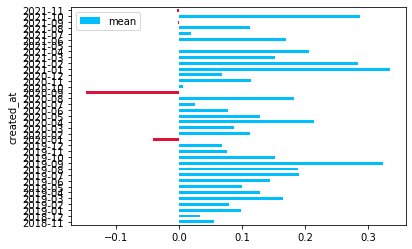

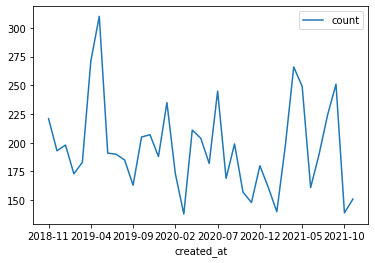

In [266]:
df_monthly = df
df_monthly['created_at'] = pd.to_datetime(df_monthly['created_at'])
rr = df_monthly.groupby(df['created_at'].dt.strftime('%Y-%m'))['sentiment_score_rm_self_sw']\
.agg(['mean', 'count']).sort_values('created_at')

#rr = rr.reset_index()

import matplotlib.pyplot as plt
import numpy as np
rr.plot(kind = "barh", y= "mean", color=np.where(rr['mean'] > 0, 'deepskyblue', 'crimson'))
rr.plot(kind = "line", y= "count")


# Tweets words count

In [269]:
import itertools
import collections

#print(df['processed_text'].values)

# !!!! PICK ONE, 1) all time 2) particular time range 
selected_df = df
selected_df = df[(df['date'] > '2021-01-01') & (df['date'] <= '2021-11-30')]

words_in_tweet = list(selected_df['processed_text_rm_standard_sw'].values)

# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

#print(counts_no_urls)

#counts_no_urls.most_common(100)

clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(25),
                             columns=['words', 'count'])

##### POSITIVE word count
p_df = selected_df[selected_df['sentiment_score_rm_self_sw'] > 0.5]
n_df = selected_df[selected_df['sentiment_score_rm_self_sw'] < -0.5]

p_words_in_tweet = list(p_df['processed_text_rm_standard_sw'].values)
n_words_in_tweet = list(n_df['processed_text_rm_standard_sw'].values)

p_all_words_no_urls = list(itertools.chain(*p_words_in_tweet))
n_all_words_no_urls = list(itertools.chain(*n_words_in_tweet))

p_counts_no_urls = collections.Counter(p_all_words_no_urls)
n_counts_no_urls = collections.Counter(n_all_words_no_urls)

p_clean_tweets_no_urls = pd.DataFrame(p_counts_no_urls.most_common(25),
                             columns=['words', 'count'])

n_clean_tweets_no_urls = pd.DataFrame(n_counts_no_urls.most_common(25),
                             columns=['words', 'count'])

# clean_tweets_no_urls

# p_clean_tweets_no_urls

n_clean_tweets_no_urls

,words,count
0,infertility,277
1,infertile,132
2,vaccine,60
3,women,55
4,get,50
5,people,47
6,covid,44
7,make,42
8,cause,40
9,know,35


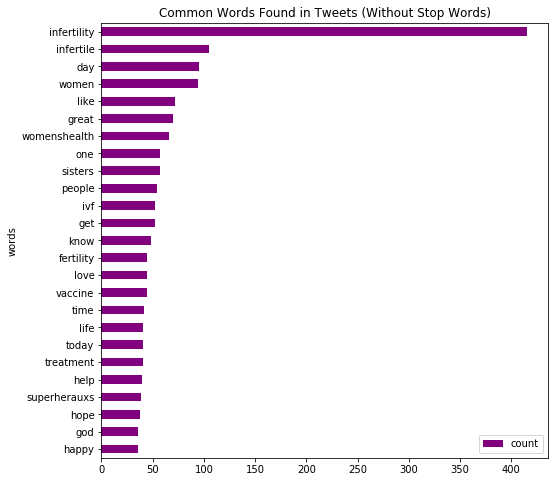

In [270]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
p_clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()